## GDP Growth under Obama and Trump
As recounted in an [article in "The Hill"](http://thehill.com/homenews/administration/348600-trump-touts-3-percent-economic-growth-takes-shot-at-obama), President Trump stated the following on August 30, 2017 in a speech on tax reform in Springfield, Missouri:

> We just announced that we hit 3 percent in [gross domestic product]. It just came out. And on a yearly basis, as you know, the last administration during an eight-year period never hit 3 percent, so we're really on our way.

The Hill article goes on to explain that, under Obama, the economy hit or surpassed 3 percent growth during numerous quarters, but never sustained that level of growth for a full year. The following Python code looks at available GDP data to see to what degree the original claim is true.

### Read latest GDP figures from Bureau of Economic Analysis website
The following code reads both the annual and quarterly GDP figures from the Bureau of Economic Analysis website and calculates the percent change between successive periods.

In [16]:
import pandas as pd
xx = pd.read_excel('https://www.bea.gov/national/xls/gdplev.xlsx', skiprows=7)
aa = xx.iloc[0:89, 0:3]
aa.columns = ['Year','Current $bil','Chained 2009 $bil']
qq = xx.iloc[0:286, 4:7] #UPDATE final row
qq.columns = ['Quarter','Current $bil','Chained 2009 $bil']
aa['Pct_Change'] = aa.loc[:,'Chained 2009 $bil'].pct_change()*100
qq['Pct_Change'] = qq.loc[:,'Chained 2009 $bil'].pct_change()*100
print(aa.head())
print(aa.tail(18))

     Year  Current $bil  Chained 2009 $bil  Pct_Change
0  1929.0         104.6             1109.4         NaN
1  1930.0          92.2             1015.1   -8.500090
2  1931.0          77.4              950.0   -6.413161
3  1932.0          59.5              827.5  -12.894737
4  1933.0          57.2              817.3   -1.232628
      Year  Current $bil  Chained 2009 $bil  Pct_Change
71  2000.0       10252.3            13131.0    4.127513
72  2001.0       10581.8            13262.1    0.998401
73  2002.0       10936.4            13493.1    1.741806
74  2003.0       11458.2            13879.1    2.860721
75  2004.0       12213.7            14406.4    3.799238
76  2005.0       13036.6            14912.5    3.513022
77  2006.0       13814.6            15338.3    2.855323
78  2007.0       14451.9            15626.0    1.875697
79  2008.0       14712.8            15604.7   -0.136311
80  2009.0       14448.9            15208.8   -2.537056
81  2010.0       14992.1            15598.8    2.56430

The above output shows that GDP growth did not reach or exceed 3 percent during any of Obama's eight calendar years from 2009 through 2016. The closest that it came was 2.86 percent in 2015. However, it likewise did not reach 3 percent in Trump's first year, reaching just 2.27 percent in 2017. In fact, the last time that GDP growth surpassed 3 percent was in 2005 when it reached 3.35 percent. The following code generates a plot of GDP growth since 1929, the start of the annual GDP data:

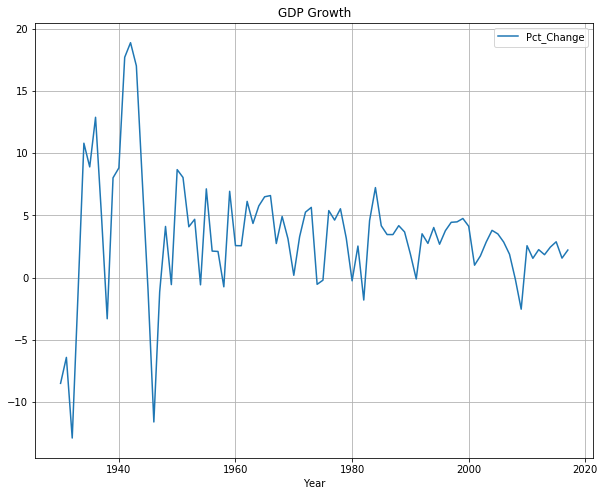

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
aa.plot.line(x='Year',y='Pct_Change',figsize=(10,8),grid=True,title='GDP Growth')

The following code prints the quarterly GDP data and the percent change in real quarterly GDP.

In [18]:
print(qq.head())
print(qq.tail(10))

  Quarter  Current $bil  Chained 2009 $bil  Pct_Change
0  1947Q1         243.2             2033.1         NaN
1  1947Q2         246.0             2027.6   -0.270523
2  1947Q3         249.6             2023.5   -0.202210
3  1947Q4         259.7             2055.1    1.561651
4  1948Q1         265.7             2086.0    1.503576
    Quarter  Current $bil  Chained 2009 $bil  Pct_Change
276  2016Q1       18409.1            17523.4    0.384964
277  2016Q2       18640.7            17622.5    0.565530
278  2016Q3       18799.6            17706.7    0.477798
279  2016Q4       18979.2            17784.2    0.437687
280  2017Q1       19162.6            17863.0    0.443090
281  2017Q2       19359.1            17995.2    0.740077
282  2017Q3       19588.1            18120.8    0.697964
283  2017Q4       19831.8            18223.8    0.568408
284  2018Q1       20041.0            18324.0    0.549830
285  2018Q2       20402.5            18507.2    0.999782


As can be seen, the percent change in real quarterly GDP has not surpassed one percent in the last 10 quarters. This is not that surprising, however, because this is the change for 1 quarter and is not annualized. For this reason, this percent change is not especially useful in this form.

### Calculate percent change over the each quarter (annualized), each 4 quarters, and each calendar year
To remedy this, the following code annualizes the quarterly percent change and also calculates the percent change over every consecutive four quarters, as well as each calendar year.

In [19]:
qq['iYear'] = qq['Quarter'].str[0:4]
qq['iQtr'] = qq['Quarter'].str[5:6]
qq['Year'] = pd.to_numeric(qq['iYear']) + (pd.to_numeric(qq['iQtr'])-1) * 0.25
qq['Change1q'] = (((1 + qq.loc[:,'Chained 2009 $bil'].pct_change())**4)-1)*100
qq['Change4q'] = (qq.loc[:,'Chained 2009 $bil'].pct_change(periods=4))*100
for index,row in aa.iterrows():
    qq.loc[qq['Year']==row['Year'],'Change1y'] = row['Pct_Change']
    qq.loc[qq['Year']==(row['Year']+0.25),'Change1y'] = row['Pct_Change']
    qq.loc[qq['Year']==(row['Year']+0.50),'Change1y'] = row['Pct_Change']
    qq.loc[qq['Year']==(row['Year']+0.75),'Change1y'] = row['Pct_Change']
gg = qq.loc[:, ['Quarter','Year','Change1q','Change4q','Change1y']]
print(gg.tail(n=40))

    Quarter     Year  Change1q  Change4q  Change1y
246  2008Q3  2008.50 -2.148502  0.001915 -0.136311
247  2008Q4  2008.75 -8.378248 -2.753458 -0.136311
248  2009Q1  2009.00 -4.416054 -3.289432 -2.537056
249  2009Q2  2009.25 -0.574113 -3.924506 -2.537056
250  2009Q3  2009.50  1.464286 -3.049722 -2.537056
251  2009Q4  2009.75  4.468203  0.183325 -2.537056
252  2010Q1  2010.00  1.545728  1.710225  2.564305
253  2010Q2  2010.25  3.741260  2.796334  2.564305
254  2010Q3  2010.50  2.981873  3.178574  2.564305
255  2010Q4  2010.75  2.021268  2.569012  2.564305
256  2011Q1  2011.00 -0.956513  1.931223  1.550760
257  2011Q2  2011.25  2.889610  1.721378  1.550760
258  2011Q3  2011.50 -0.111169  0.948826  1.550760
259  2011Q4  2011.75  4.718218  1.609462  1.550760
260  2012Q1  2012.00  3.168668  2.651342  2.249269
261  2012Q2  2012.25  1.732221  2.361438  2.249269
262  2012Q3  2012.50  0.541878  2.528333  2.249269
263  2012Q4  2012.75  0.454514  1.468374  2.249269
264  2013Q1  2013.00  3.591924 

As can be seen from the above output, annualized quarterly GDP growth did surpass 3 percent under Obama in the following quarters:

<pre>
    Quarter     Year  Change1q  Change4q  Change1y
251  2009Q4  2009.75  3.928122 -0.240790 -2.776055
253  2010Q2  2010.25  3.920848  2.718800  2.532128
259  2011Q4  2011.75  4.582364  1.682174  1.601753
266  2013Q3  2013.50  3.120601  1.693670  1.677673
267  2013Q4  2013.75  3.959972  2.662455  1.677673
269  2014Q2  2014.25  4.600845  2.668539  2.569145
270  2014Q3  2014.50  5.211890  3.185157  2.569145
272  2015Q1  2015.00  3.239575  3.759456  2.861371
</pre>

In addition, it surpassed 3 percent under Trump in the following 2 of his 4 quarters:

<pre>
    Quarter     Year  Change1q  Change4q  Change1y
281  2017Q2  2017.25  3.061172  2.206019  2.273244
282  2017Q3  2017.50  3.155671  2.299426  2.273244
</pre>

Over all spans of 4 quarters, real GDP growth surpassed 3 percent under Obama in spans starting in the following quarters:

<pre>
    Quarter     Year  Change1q  Change4q  Change1y
254  2010Q3  2010.50  2.729265  3.075855  2.532128
270  2014Q3  2014.50  5.211890  3.185157  2.569145
272  2015Q1  2015.00  3.239575  3.759456  2.861371
273  2015Q2  2015.25  2.740879  3.295097  2.861371
</pre>

There has only been only one span of 4 quarters under Trump and GDP growth did not surpass 3 percent during it.

Finally, as previously mentioned, GDP growth did not surpass 3 percent growth during a calendar year under either Obama or Trump. The following code generates a plot that shows all of the abovementioned percent changes.

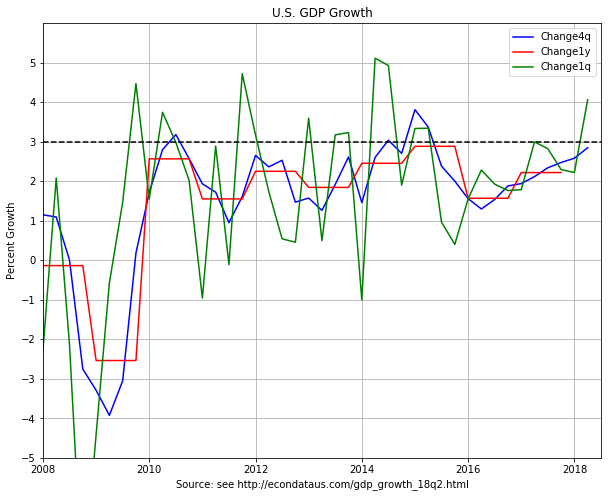

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
#rr = qq[pd.to_numeric(qq['iYear']) >= 2008]
#rr.plot.line(x='Year',y=['Change4q','Change1y','Change1q'],figsize=(10,8),grid=True,title='GDP Growth',yticks=range(-9,6),ylim=(-5,6))
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.grid()
ax.set_title('U.S. GDP Growth')
ax.set_xlabel('Source: see http://econdataus.com/gdp_growth_18q2.html')
ax.set_ylabel('Percent Growth')
ax.set_xlim([2008,2018.5]) # #UPDATE x-axis
ax.set_ylim([-5,6])
ax.set_yticks(range(-5,6))
ax.plot(qq.Year,qq.Change4q,'b-')
ax.plot(qq.Year,qq.Change1y,'r-')
ax.plot(qq.Year,qq.Change1q,'g-')
ax.axhline(y=3, color='k', linestyle='--')
ax.legend()
fig.savefig('gdp08_18q2.png')

Hence, saying that "the last administration during an eight-year period never hit 3 percent" and that "we hit 3 percent" is comparing annual calendar figures with quarterly figures. This is arguably equivalent to comparing apples and oranges. At the very least, it would seem that the current administration has no real grounds to claim that they have improved economic growth at this point. Only if they can consistently surpass 3 percent real GDP growth over several year and/or measurably increase the average GDP growth, would it seem valid to make that claim.

Note: The Jupyter Notebook from which this post is generated can be found at http://econdataus.com/gdp_growth_18q2.ipynb. It is identical to the one at http://econdataus.com/gdp_growth.ipynb except that it has been updated to include Q2 of 2018. Links to additional Jupyter Notebooks can be found at http://econdataus.com/jupyter.html.